# Data Cleaning

In [1]:
# Dependencies
import pandas as pd


In [2]:
# Clean up raw CSVs
codes_list = ["SLC","ATL","FLL","MIA","MCO","MSP","LAX","LAS","DFW","DEN","CLT","PHL","PHX","BOS","IAH","SAN","SEA","SFO","ORD","BWI",'DTW',"EWR","JFK","LGA","DCA"]

airline_df = pd.read_csv("2023.csv")
airline_clean = airline_df.dropna()
airline_clean = airline_clean.reset_index(drop=True)
columns_list = list(airline_clean.columns)
top25 = pd.DataFrame({}, columns=columns_list)
for index, row in airline_clean.iterrows():
    if row['airport'] in codes_list:
        top25.loc[len(top25)] = row
top25.reset_index(drop=True, inplace=True)
top25.to_csv("clean_files/clean_2023.csv")


In [3]:
# Read in clean files
_2004df = pd.read_csv("clean_files/clean_2004.csv", index_col="Unnamed: 0")
_2005df = pd.read_csv("clean_files/clean_2005.csv", index_col="Unnamed: 0")
_2006df = pd.read_csv("clean_files/clean_2006.csv", index_col="Unnamed: 0")
_2007df = pd.read_csv("clean_files/clean_2007.csv", index_col="Unnamed: 0")
_2008df = pd.read_csv("clean_files/clean_2008.csv", index_col="Unnamed: 0")
_2009df = pd.read_csv("clean_files/clean_2009.csv", index_col="Unnamed: 0")
_2010df = pd.read_csv("clean_files/clean_2010.csv", index_col="Unnamed: 0")
_2011df = pd.read_csv("clean_files/clean_2011.csv", index_col="Unnamed: 0")
_2012df = pd.read_csv("clean_files/clean_2012.csv", index_col="Unnamed: 0")
_2013df = pd.read_csv("clean_files/clean_2013.csv", index_col="Unnamed: 0")
_2014df = pd.read_csv("clean_files/clean_2014.csv", index_col="Unnamed: 0")
_2015df = pd.read_csv("clean_files/clean_2015.csv", index_col="Unnamed: 0")
_2016df = pd.read_csv("clean_files/clean_2016.csv", index_col="Unnamed: 0")
_2017df = pd.read_csv("clean_files/clean_2017.csv", index_col="Unnamed: 0")
_2018df = pd.read_csv("clean_files/clean_2018.csv", index_col="Unnamed: 0")
_2019df = pd.read_csv("clean_files/clean_2019.csv", index_col="Unnamed: 0")
_2020df = pd.read_csv("clean_files/clean_2020.csv", index_col="Unnamed: 0")
_2021df = pd.read_csv("clean_files/clean_2021.csv", index_col="Unnamed: 0")
_2022df = pd.read_csv("clean_files/clean_2022.csv", index_col="Unnamed: 0")
_2023df = pd.read_csv("clean_files/clean_2023.csv", index_col="Unnamed: 0")


In [26]:
frames = [_2004df,_2005df,_2006df,_2007df,_2008df,_2009df,_2010df,_2011df,_2012df,_2013df,_2014df,_2015df,_2016df,_2017df,_2018df,_2019df,_2020df,_2021df,_2022df,_2023df]
merge_df = pd.concat(frames)
# Reset the index
merge_df = merge_df.reset_index(drop=True)
# Clean up the ExpressJet Airlines Data
for i in range(len(merge_df["carrier_name"])):
    if merge_df["carrier_name"].loc[i] == "ExpressJet Airlines LLC":
        merge_df.loc[i, "carrier_name"] = "ExpressJet Airlines Inc."

merge_df.to_csv("clean_files/merge_df.csv")


# Visualization


In [27]:
# Dependencies
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [28]:
# Reduce data to the columns needed
columnsKeep = ["year","carrier","carrier_name","airport","airport_name","per_delayed"]
years = list(merge_df["year"].unique())

# Create a column for the percent of delayed flights in each row
merge_df["per_delayed"] = (merge_df["arr_del15"] / merge_df["arr_flights"])

clean_merge_df = pd.DataFrame(merge_df, columns=columnsKeep)


In [29]:
def avg_by_carrier(year):
    avgByCarrier = clean_merge_df[clean_merge_df["year"] == year].groupby("carrier_name")["per_delayed"].mean()
    return avgByCarrier

def avg_by_airport(year):
    avgByAirport = clean_merge_df[clean_merge_df["year"] == year].groupby("airport")["per_delayed"].mean()
    return avgByAirport

def percentify(data):
    percentified = round((data * 100), 2)
    return percentified

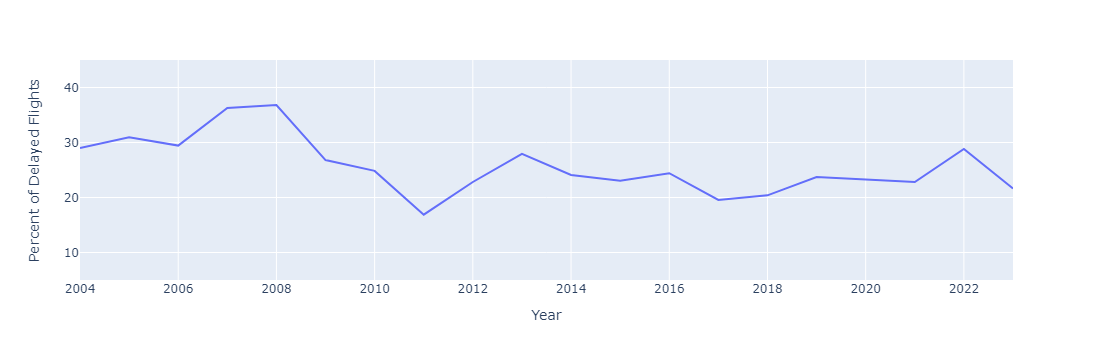

In [34]:
# Vis for Avg # of delayed flights grouping all Airports across all years
y_vals = []
for i in years:
    loop_val = np.mean(list(avg_by_airport(i)))
    y_vals.append(loop_val)

for i, val in enumerate(y_vals):
    y_vals[i] = percentify(val)

x = years
y = y_vals

fig = px.line(x=x, y=y, labels={'x':'Year', 'y':'Percent of Delayed Flights'} )
fig.update_yaxes(range=[5, 45])
fig.show()

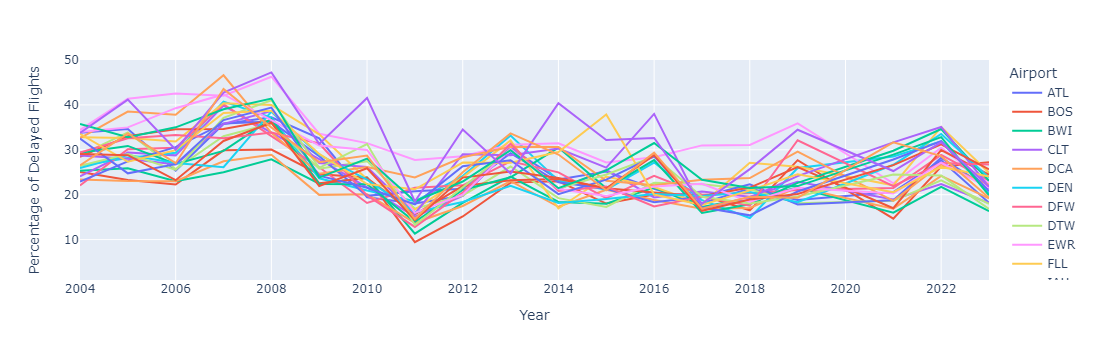

In [31]:
# Vis for Avg # of delayed flights seperated by Airport grouping all Carrier across all years
delaysByAirports = pd.DataFrame( columns=list(clean_merge_df["airport"].unique()) )
for i in years:
    delaysByAirports.loc[i] = avg_by_airport(i)
delaysByAirports = percentify(delaysByAirports)
delaysByAirports = delaysByAirports.transpose().reset_index()
delaysByAirports.columns = ['Airport'] + list(years)
melted_df = pd.melt(delaysByAirports, id_vars=['Airport'], var_name='Year', value_name='Delay')

fig = px.line(melted_df, x='Year', y='Delay', color='Airport', labels={'Year': 'Year', 'Delay': 'Percentage of Delayed Flights'}, )
fig.update_yaxes(range=[1, 50])

fig.show()


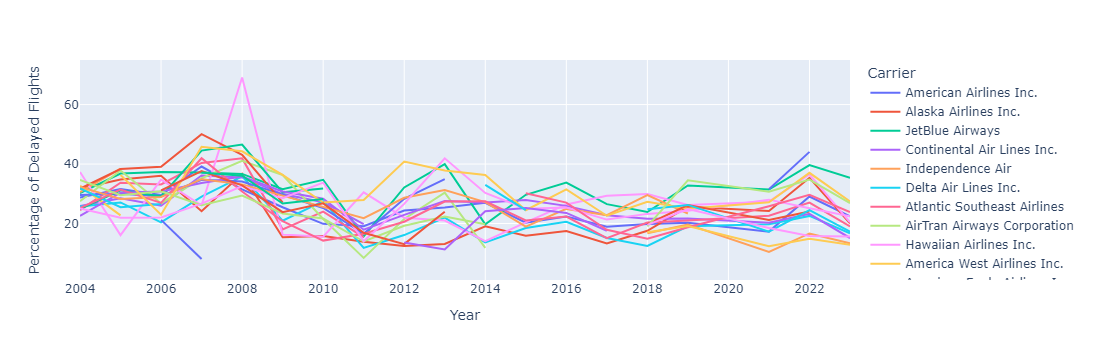

In [32]:
# Vis for Avg # of delayed flights seperated by Carrier grouping all Airports across all years
delaysByCarrier = pd.DataFrame( columns=list(clean_merge_df["carrier_name"].unique()) )
for i in years:
    delaysByCarrier.loc[i] = avg_by_carrier(i)
delaysByCarrier = percentify(delaysByCarrier)
delaysByCarrier = delaysByCarrier.transpose().reset_index()
delaysByCarrier.columns = ['Carrier'] + list(years)
melted_df = pd.melt(delaysByCarrier, id_vars=['Carrier'], var_name='Year', value_name='Delay')

fig = px.line(melted_df, x='Year', y='Delay', color='Carrier', labels={'Year': 'Year', 'Delay': 'Percentage of Delayed Flights'} )
fig.update_yaxes(range=[1, 75])

fig.show()
